# **Database Shopping Customers**

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

shopping_customers = pd.read_csv('clientes-shopping.csv').drop(['CustomerID'], axis = 1)
shopping_customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


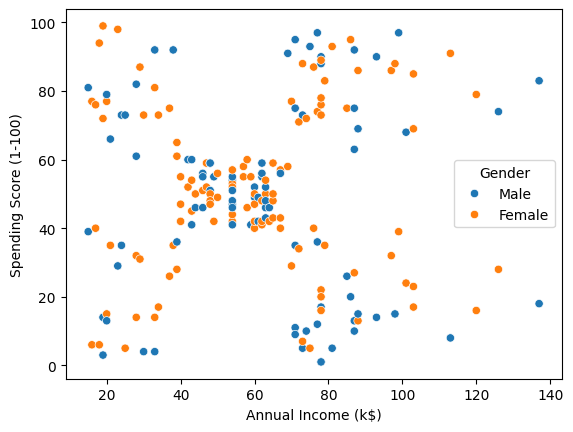

In [44]:
sns.scatterplot(shopping_customers, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender')
plt.show()

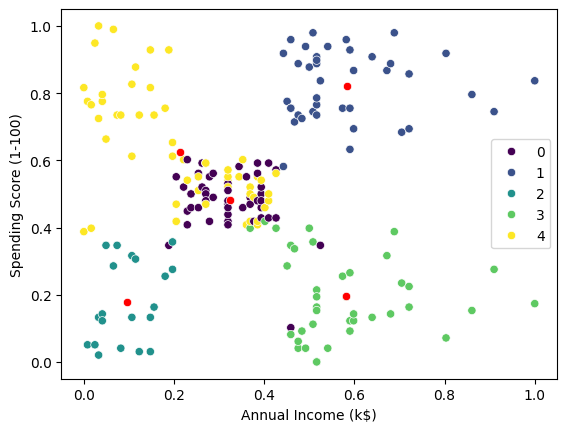

In [45]:
aux = shopping_customers.drop('Gender', axis = 1)
minmax = MinMaxScaler()
aux = pd.DataFrame(minmax.fit_transform(aux), columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_fit = kmeans.fit(aux)
aux['Cluster'] = kmeans_fit.labels_

# Plotando os gráficos
sns.scatterplot(aux, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', palette='viridis') # Gráfico do valores classificados

# Gráfico dos clusters
db_cluster = pd.DataFrame(kmeans_fit.cluster_centers_, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']) # DataFrame dos clasters
sns.scatterplot(db_cluster, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'red')

plt.show()

In [46]:
aux.groupby('Cluster').describe()

Age                                                              \
        count      mean       std       min       25%       50%       75%   
Cluster                                                                     
0        47.0  0.731588  0.165670  0.423077  0.596154  0.692308  0.903846   
1        40.0  0.286058  0.074185  0.173077  0.230769  0.269231  0.346154   
2        20.0  0.543269  0.222689  0.038462  0.360577  0.557692  0.677885   
3        39.0  0.411243  0.201482  0.019231  0.307692  0.423077  0.548077   
4        54.0  0.138177  0.105931  0.000000  0.057692  0.115385  0.230769   

                  Annual Income (k$)            ...                      \
              max              count      mean  ...       75%       max   
Cluster                                         ...                       
0        1.000000               47.0  0.324730  ...  0.385246  0.524590   
1        0.423077               40.0  0.582787  ...  0.647541  1.000000   
2        0.942308               20.0  0.096311  ...  0.147541  0.196721   
3        0.788462               39.0  0.580496  ...  0.655738  1.000000   
4        0.384615               54.0  0.213874  ...  0.350410  0.426230   

        Spending Score (1-100)                                          \
                         count      mean       std       min       25%   
Cluster                                                                  
0                         47.0  0.481980  0.084634  0.102041  0.443878   
1                         40.0  0.821684  0.102040  0.581633  0.744898   
2                         20.0  0.177041  0.121788  0.020408  0.051020   
3                         39.0  0.194924  0.122288  0.000000  0.102041   
4                         54.0  0.624906  0.169348  0.387755  0.500000   

                                       
              50%       75%       max  
Cluster                                
0        0.479592  0.540816  0.602041  
1        0.836735  0.908163  0.979592  
2        0.137755  0.290816  0.357143  
3        0.163265  0.280612  0.418367  
4        0.581633  0.750000  1.000000  

[5 rows x 24 columns]

In [47]:
kmeans_fit.cluster_centers_

array([[0.73158756, 0.32472968, 0.48198003],
       [0.28605769, 0.58278689, 0.82168367],
       [0.54326923, 0.09631148, 0.17704082],
       [0.4112426 , 0.58049601, 0.19492412],
       [0.13817664, 0.21387371, 0.62490552]])

In [48]:
kmeans_fit.labels_
silhouette_score(aux, kmeans_fit.labels_)

np.float64(0.7553580771679402)

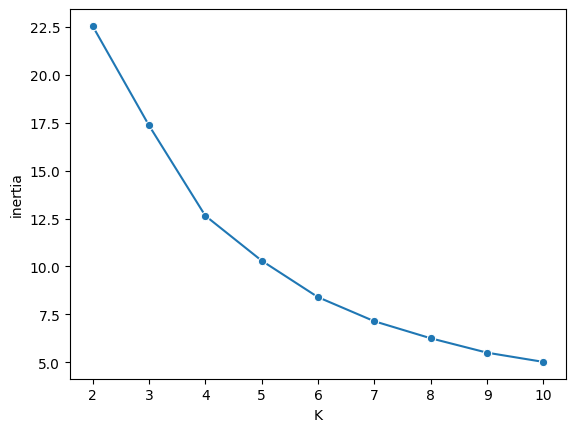

In [49]:
inertia = []
K = list(range(2, 11))

df2 = shopping_customers.drop('Gender', axis = 1)

minmax = MinMaxScaler()
df2 = pd.DataFrame(minmax.fit_transform(df2), columns = df2.columns)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  inertia.append(kmeans.fit(df2).inertia_)


sns.lineplot(data = pd.DataFrame({'inertia': inertia, 'K': K}), x = 'K', y = 'inertia', marker='o')
plt.show()

# **Database Monkey**

In [69]:
monkey = pd.read_csv(r"C:\Users\PP\OneDrive - Fundação São Paulo\PUC-SP\4 Semestre\Mineração de Dados\Dados\monkey.csv")
monkey

,d1,d2
0,8.809783,7.611147
1,4.110747,11.103186
2,4.114710,11.039587
3,3.154736,6.743244
4,5.972931,7.537982
...,...,...
3995,-1.601140,14.773205
3996,-1.578630,14.893001
3997,-1.558350,15.013389
3998,-1.540340,15.134325


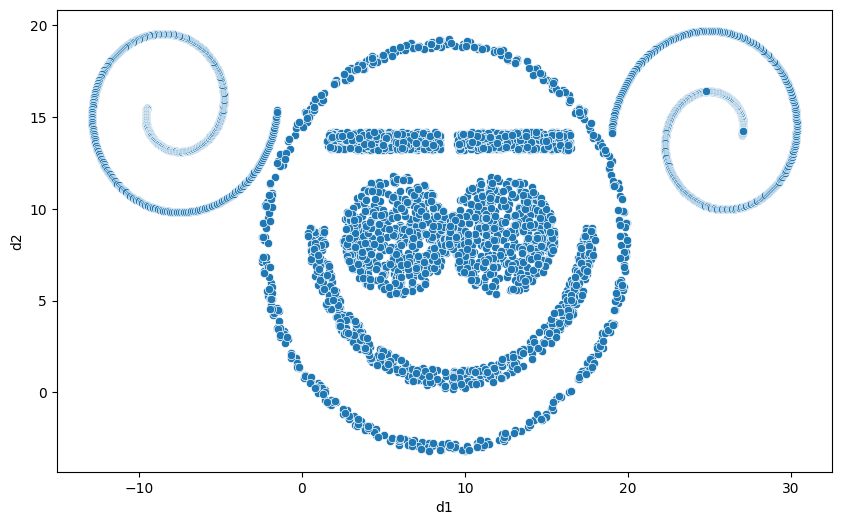

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(monkey, x = 'd1', y = 'd2')
plt.show()

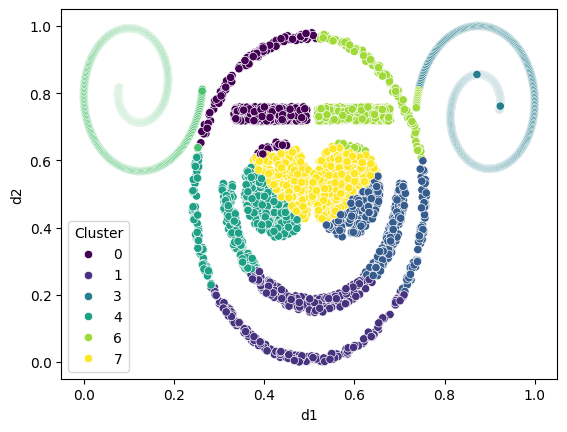

In [75]:
normalizer = MinMaxScaler()
monkey_normalized = pd.DataFrame(normalizer.fit_transform(monkey), columns = ['d1', 'd2'])
monkey_normalized
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_fit = kmeans.fit(monkey_normalized)
monkey_normalized['Cluster'] = kmeans_fit.labels_

sns.scatterplot(monkey_normalized, x = 'd1', y = 'd2', hue = 'Cluster', palette='viridis')
plt.show()

In [76]:
globular = pd.read_csv(r"C:\Users\PP\OneDrive - Fundação São Paulo\PUC-SP\4 Semestre\Mineração de Dados\Dados\globular.csv")
globular 

,d1,d2
0,8.809783,7.611147
1,4.110747,11.103186
2,4.114710,11.039587
3,3.154736,6.743244
4,5.972931,7.537982
...,...,...
995,13.092329,9.110222
996,13.071551,9.641615
997,10.383887,6.139417
998,9.420275,8.473474
